In [46]:
# Este es el notebook más importante del boodcamp

# Comparaciones, máscaras y lógica booleana

Esta sección cubre el uso de máscaras booleanas para examinar y manipular valores dentro de matrices NumPy.
El enmascaramiento aparece cuando se desea extraer, modificar, contar o manipular valores en un array basándose en algún criterio: por ejemplo, puede que desee contar todos los valores mayores que un cierto valor, o quizás eliminar todos los valores atípicos que están por encima de algún umbral.
En NumPy, el enmascaramiento booleano es a menudo la forma más eficiente de realizar este tipo de tareas.

## Ejemplo: Contar días de lluvia

Imagina que tienes una serie de datos que representan la cantidad de precipitación cada día durante un año en una ciudad determinada.
Por ejemplo, aquí cargaremos las estadísticas de precipitaciones diarias para la ciudad de Seattle en 2014, utilizando Pandas:

In [47]:
import numpy as np
import pandas as pd

# usa pandas para extraer las pulgadas de lluvia como un array NumPy
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [48]:
inches # Es un array con los valores de precipitación en pulgadas.

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134,
       0.83858268, 0.05905512, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01968504, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3503937 , 0.8503937 , 0.        ,
       0.09055118, 0.07874016, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2007874 , 0.01968504,
       0.72047244, 0.66929134, 0.18110236, 0.07086614, 0.37007874,
       0.46062992, 1.03937008, 0.57086614, 0.5984252 , 0.03937008,
       0.11811024, 0.11023622, 0.0984252 , 0.24015748, 0.51181102,
       0.01181102, 0.        , 0.        , 0.        , 0.01968504,
       0.7519685 , 0.42125984, 0.6496063 , 1.83858268, 0.11811024,
       0.        , 1.27165354, 0.16929134, 0.74015748, 0.        ,
       0.        , 0.01968504, 0.27165354, 0.31889764, 1.09055

La matriz contiene 365 valores, que dan la precipitación diaria en pulgadas del 1 de enero al 31 de diciembre de 2014.

Como primera visualización rápida, veamos el histograma de días de lluvia, que se generó utilizando Matplotlib.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

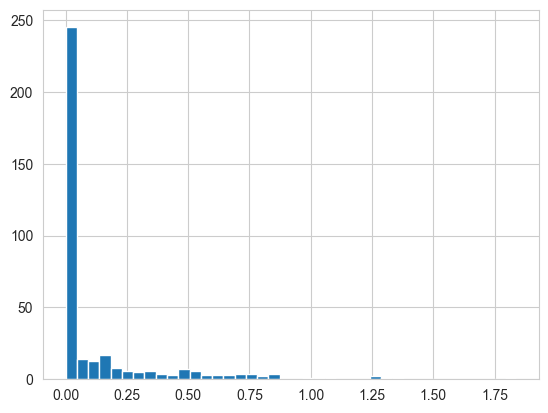

In [50]:
plt.hist(inches, 40);

Este histograma nos da una idea general de cómo son los datos: a pesar de su reputación, la gran mayoría de los días en Seattle tuvieron precipitaciones medidas cercanas a cero en 2014.
Pero esto no es suficiente para transmitir cierta información que nos gustaría ver: por ejemplo, ¿cuántos días de lluvia hubo en el año? ¿Cuál es la precipitación media en esos días de lluvia? ¿Cuántos días llovió más de medio centímetro?

### Profundizar en los datos

Una forma de hacer esto sería responder a estas preguntas a mano: hacer un bucle con los datos, incrementando un contador cada vez que veamos valores en el rango deseado.
Por las razones discutidas anteriormente, este enfoque es muy ineficiente, tanto desde el punto de vista del tiempo de escritura de código y el tiempo de cálculo del resultado.
Vimos que las ufuncs de NumPy pueden usarse en lugar de bucles para hacer operaciones aritméticas rápidas elemento a elemento sobre arrays; del mismo modo, podemos usar otras ufuncs para hacer *comparaciones* elemento a elemento sobre arrays, y podemos manipular los resultados para responder a las preguntas que tengamos.
Dejaremos los datos a un lado por ahora, y discutiremos algunas herramientas generales en NumPy para usar *enmascaramiento* para responder rápidamente a este tipo de preguntas.

## Operadores de comparación como ufuncs

En particular en los operadores aritméticos. Vimos que usar ``+``, ``-``, ``*``, ``/``, y otros en arrays lleva a operaciones elemento a elemento.
NumPy también implementa operadores de comparación como ``<`` (menor que) y ``>`` (mayor que) como ufuncs.
El resultado de estos operadores de comparación es siempre un array de tipo booleano.
Están disponibles las seis operaciones de comparación estándar:

In [51]:
x = np.array([1, 2, 3, 4, 5])

In [52]:
x < 3  # menos de

array([ True,  True, False, False, False])

In [53]:
x > 3  # mayor que

array([False, False, False,  True,  True])

In [54]:
x <= 3  # menor o igual

array([ True,  True,  True, False, False])

In [55]:
x >= 3  # mayor o igual

array([False, False,  True,  True,  True])

In [56]:
x != 3  # no igual

array([ True,  True, False,  True,  True])

In [57]:
x == 3  # igual

array([False, False,  True, False, False])

También es posible realizar una comparación elemento a elemento de dos matrices e incluir expresiones compuestas:

In [58]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

Como en el caso de los operadores aritméticos, los operadores de comparación se implementan como ufuncs en NumPy; por ejemplo, cuando escribes ``x < 3``, internamente NumPy utiliza ``np.less(x, 3)``.
    Aquí se muestra un resumen de los operadores de comparación y su ufunc equivalente:

| Operador	    | Ufunc equivalente   |
|---------------|---------------------|
|``==``         |``np.equal``         |
|``<``          |``np.less``          |
|``>``          |``np.greater``       |
|``!=``         |``np.not_equal``     |
|``<=``         |``np.less_equal``    |
|``>=``         |``np.greater_equal`` |

Al igual que en el caso de los ufuncs aritméticos, éstos funcionarán en matrices de cualquier tamaño y forma.
He aquí un ejemplo bidimensional:

In [59]:
rng = np.random.RandomState(0) # Crear un rango
x = rng.randint(10, size=(3, 4)) # Crea una matriz
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [60]:
x < 6 # Cuales son menores que 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [61]:
# Cuando una matriz no se coresponde filas con columnas no te imprime una matriz sino que te imprime un vector 
# ya que no puede tener una fila de 4 elemento, otra de 3 y otra de 2.

En cada caso, el resultado es una matriz booleana, y NumPy proporciona una serie de patrones sencillos para trabajar con estos resultados booleanos.

## Trabajar con matrices booleanas

Dada una matriz booleana, hay un montón de operaciones útiles que puedes hacer.
Trabajaremos con ``x``, el array bidimensional que creamos antes.

In [62]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Contar entradas

Para contar el número de entradas ``True`` en una matriz booleana, ``np.count_nonzero`` es útil:

In [63]:
# ¿cuántos valores inferiores a 6?
np.count_nonzero(x < 6)

8

Vemos que hay ocho entradas del array que son menores que 6.
Otra forma de obtener esta información es utilizar ``np.sum``; en este caso, ``False`` se interpreta como ``0``, y ``True`` se interpreta como ``1``:

In [64]:
np.sum(x < 6)

np.int64(8)

La ventaja de ``sum()`` es que al igual que con otras funciones de agregación de NumPy, esta suma se puede hacer a lo largo de filas o columnas también:

In [65]:
# ¿Cuántos valores menores que 6 hay en cada fila?
np.sum(x < 6, axis=1)

array([4, 2, 2])

Cuenta el número de valores menores que 6 en cada fila de la matriz.

Si nos interesa comprobar rápidamente si alguno o todos los valores son verdaderos, podemos utilizar ``np.any`` o ``np.all``:

In [66]:
# ¿hay valores superiores a 8?
np.any(x > 8) # any es cualquiera (con que haya algun menor que 0 te devuelve un true)

np.True_

In [67]:
# ¿hay valores inferiores a cero?
np.any(x < 0)

np.False_

In [68]:
# ¿todos los valores son inferiores a 10?
np.all(x < 10) # All esa condición la tienen que cumplir todos los valore

np.True_

In [69]:
# ¿son todos los valores iguales a 6?
np.all(x == 6)

np.False_

``np.all`` y ``np.any`` también se pueden utilizar a lo largo de determinados ejes. Por ejemplo:

In [70]:
# ¿todos los valores de cada fila son menores que 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

En este caso, todos los elementos de la primera y la tercera fila son inferiores a 8, mientras que no ocurre lo mismo en la segunda fila.

### Operadores booleanos

Ya hemos visto cómo podríamos contar, digamos, todos los días con lluvia inferior a cuatro pulgadas, o todos los días con lluvia superior a dos pulgadas.
¿Pero qué pasa si queremos saber todos los días en los que llueve menos de cuatro pulgadas y más de una pulgada?
Esto se consigue mediante los operadores lógicos *bitwise* de Python, ``&``, ``|``, ``^`` y ``~``.
Al igual que con los operadores aritméticos estándar, NumPy los sobrecarga como ufuncs que funcionan elemento a elemento en matrices (normalmente booleanas).

Por ejemplo, podemos abordar este tipo de pregunta compuesta de la siguiente manera:

In [71]:
np.sum((inches > 0.5) & (inches < 1))

np.int64(29)

Así, vemos que hay 29 días con precipitaciones entre 0,5 y 1,0 pulgadas.

Tenga en cuenta que los paréntesis aquí son importantes, debido a las reglas de precedencia de operadores, con los paréntesis eliminados esta expresión se evaluaría de la siguiente manera, lo que da lugar a un error:

``` python
pulgadas > (0.5 & pulgadas) < 1
```


In [72]:
np.sum(~( (inches <= 0.5) | (inches >= 1) )) # | es un or ~ es el contrario

np.int64(29)

La combinación de operadores de comparación y operadores booleanos en matrices puede dar lugar a una amplia gama de operaciones lógicas eficaces.

La siguiente tabla resume los operadores booleanos bit a bit y sus ufuncs equivalentes:

| Operator	    | Equivalent ufunc    |
|---------------|---------------------|
|``&``          |``np.bitwise_and``   |
|``^``          |``np.bitwise_xor``   |
|``\|``         |``np.bitwise_or``    |
|``~``          |``np.bitwise_not``   |

Utilizando estas herramientas, podríamos empezar a responder a los tipos de preguntas que tenemos sobre nuestros datos meteorológicos.
He aquí algunos ejemplos de resultados que podemos calcular al combinar el enmascaramiento con las agregaciones:

In [73]:
print("Número de días sin lluvia:      ", np.sum(inches == 0))
print("Número de días con lluvia:         ", np.sum(inches != 0))
print("Días con más de 0,5 pulgadas:", np.sum(inches > 0.5))
print("Días de lluvia con < 0,2 pulgadas  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Número de días sin lluvia:       215
Número de días con lluvia:          150
Días con más de 0,5 pulgadas: 37
Días de lluvia con < 0,2 pulgadas  : 75


## Matrices booleanas como máscaras

En la sección anterior vimos agregados calculados directamente sobre matrices booleanas.
Un patrón más potente es utilizar matrices booleanas como máscaras, para seleccionar subconjuntos particulares de los propios datos.
Volviendo a nuestra matriz ``x`` de antes, supongamos que queremos una matriz de todos los valores de la matriz que son menores que, digamos, 5:

In [74]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

Podemos obtener una matriz booleana para esta condición fácilmente, como ya hemos visto:

In [75]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Ahora, para *seleccionar* estos valores de la matriz, podemos simplemente indexar en esta matriz booleana; esto se conoce como una operación de *enmascaramiento*:

In [76]:
x[x < 5]

array([0, 3, 3, 3, 2, 4], dtype=int32)

Lo que se devuelve es una matriz unidimensional llena con todos los valores que cumplen esta condición; en otras palabras, todos los valores en posiciones en las que la matriz de máscaras es ``True``.

A continuación, podemos operar con estos valores como queramos.
Por ejemplo, podemos calcular algunas estadísticas relevantes sobre los datos de lluvia de Seattle:

In [77]:
# construir una máscara de todos los días de lluvia
rainy = (inches > 0)

# construir una máscara de todos los días de verano (el 21 de junio es el 172º día)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Mediana de la precipitación en días de lluvia en 2014 (pulgadas):   ",
      np.median(inches[rainy]))
print("Mediana de la precipitación en días de verano de 2014 (pulgadas):  ",
      np.median(inches[summer]))
print("Precipitación máxima en los días de verano de 2014 (pulgadas): ",
      np.max(inches[summer]))
print("Precipitación media en días de lluvia no estivales (pulgadas):",
      np.median(inches[rainy & ~summer]))

Mediana de la precipitación en días de lluvia en 2014 (pulgadas):    0.19488188976377951
Mediana de la precipitación en días de verano de 2014 (pulgadas):   0.0
Precipitación máxima en los días de verano de 2014 (pulgadas):  0.8503937007874016
Precipitación media en días de lluvia no estivales (pulgadas): 0.20078740157480315


Combinando operaciones booleanas, operaciones de enmascaramiento y agregados, podemos responder muy rápidamente a este tipo de preguntas para nuestro conjunto de datos.

## Aside: Uso de las palabras clave y/o frente a los operadores &/|

Un punto común de confusión es la diferencia entre las palabras clave ``and`` y ``or`` por un lado, y los operadores ``&`` y ``|`` por otro.
¿Cuándo utilizar uno y cuándo el otro?

La diferencia es la siguiente: ``and`` y ``or`` miden la verdad o falsedad de *todo un objeto*, mientras que ``&`` y ``|`` se refieren a *bits dentro de cada objeto*.

Cuando usas ``and`` o ``or``, es equivalente a pedir a Python que trate el objeto como una única entidad booleana.
En Python, todos los enteros distintos de cero se evaluarán como True. Por lo tanto:

In [78]:
bool(42), bool(0)

(True, False)

In [79]:
bool(42 and 0)

False

In [80]:
bool(42 or 0)

True

Cuando utilizas ``&`` y ``|`` en números enteros, la expresión opera sobre los bits del elemento, aplicando el *and* o el *or* a los bits individuales que componen el número:

In [81]:
bin(42)

'0b101010'

In [82]:
bin(59)

'0b111011'

In [83]:
bin(42 & 59)

'0b101010'

In [84]:
bin(42 | 59)

'0b111011'

Observe que los bits correspondientes de la representación binaria se comparan para obtener el resultado.

Cuando se tiene una matriz de valores booleanos en NumPy, esto puede ser pensado como una cadena de bits donde ``1 = True`` y ``0 = False``, y el resultado de ``&`` y ``|`` opera de manera similar a la anterior:

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B # A or B de vuelve donde con iguales en cad uno de ellos

array([ True,  True,  True, False,  True,  True])

El uso de ``or`` en estas matrices tratará de evaluar la verdad o falsedad de todo el objeto matriz, que no es un valor bien definido:

In [ ]:
A or B

Del mismo modo, al realizar una expresión booleana en un array dado, debes utilizar ``|`` o ``&`` en lugar de ``or`` o ``and``:

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

Intentar evaluar la verdad o falsedad de todo el array dará el mismo ``ValueError`` que vimos anteriormente:

In [ ]:
(x > 4) and (x < 8)

Así que recuerde esto: ``and`` y ``or`` realizan una única evaluación booleana sobre un objeto entero, mientras que ``&`` y ``|`` realizan múltiples evaluaciones booleanas sobre el contenido (los bits o bytes individuales) de un objeto.
Para las matrices booleanas de NumPy, esta última es casi siempre la operación deseada.

<!--NAVIGATION-->
< [Calculo sobre agregados de Matrices](4-Calculo_sobre_agregados_de_matrices.ipynb) | [Sorting](6-Sorting.ipynb) >
